# VALOR JUSTO USD/BRL

## VALOR JUSTO (HOJE)

In [4]:
def calcular_valor_justo(ipca_a, ipca_b, taxa_cambio_inicial):
    # Convertendo os valores de IPCA para frações
    ipca_a /= 100
    ipca_b /= 100

    # Calculando o valor justo da moeda
    valor_justo = ((1 + ipca_a) / (1 + ipca_b)) * taxa_cambio_inicial

    return valor_justo

# Exemplo de uso
ipca_a = float(input("Digite o valor do IPCA_a (em porcentagem): "))
ipca_b = float(input("Digite o valor do IPCA_b (em porcentagem): "))
taxa_cambio_inicial = float(input("Digite a taxa de câmbio inicial: "))

valor_justo = calcular_valor_justo(ipca_a, ipca_b, taxa_cambio_inicial)
print("------------------------------------------------")
print(f"\n\nO valor justo aproximado da moeda é: {valor_justo:.2f}")


Digite o valor do IPCA_a (em porcentagem):  5.6
Digite o valor do IPCA_b (em porcentagem):  3.3
Digite a taxa de câmbio inicial:  5.51


------------------------------------------------


O valor justo aproximado da moeda é: 5.63


## ANÁLISE DE DIFERENÇA

[*********************100%%**********************]  1 of 1 completed


Digite o valor do IPCA_a do dia atual (em porcentagem):  5.6
Digite o valor do IPCA_b do dia atual (em porcentagem):  5.3


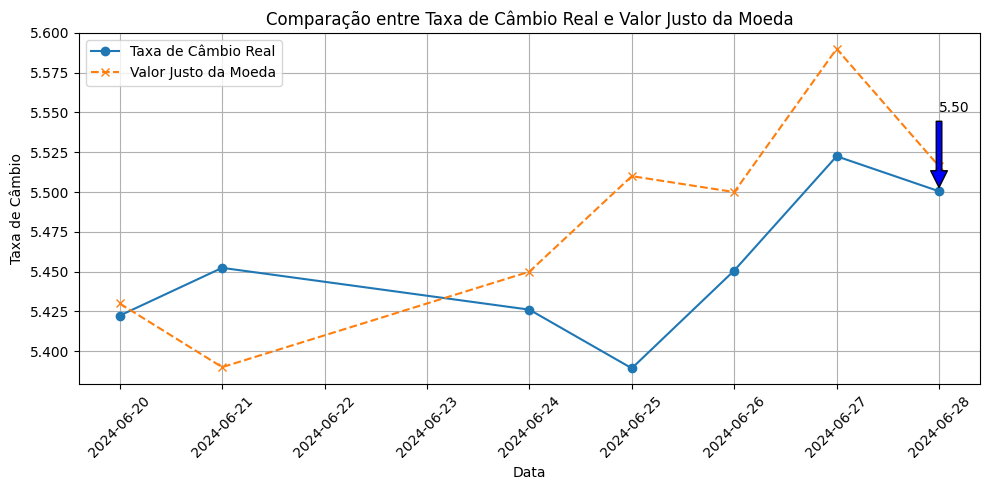

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def obter_dados_dolar():
    # Baixando os dados históricos do USD/BRL para o último mês
    dados = yf.download('BRL=X', period='1mo', interval='1d')
    dados = dados[dados.index.dayofweek < 5]  # Filtrando apenas dias úteis
    fechamentos = dados['Close'].tolist()[-7:]
    datas = dados.index.tolist()[-7:]
    return datas, fechamentos

def calcular_valor_justo(ipca_a, ipca_b, taxa_cambio_inicial):
    ipca_a /= 100
    ipca_b /= 100
    valor_justo = ((1 + ipca_a) / (1 + ipca_b)) * taxa_cambio_inicial
    return valor_justo

# Obter dados do dólar dos últimos 7 dias úteis
datas, taxas_fechamento = obter_dados_dolar()

if datas and taxas_fechamento:
    try:
        ipca_a = float(input("Digite o valor do IPCA_a do dia atual (em porcentagem): "))
        ipca_b = float(input("Digite o valor do IPCA_b do dia atual (em porcentagem): "))
    except ValueError:
        print("Por favor, insira valores numéricos válidos para o IPCA.")
        exit()

    # Calcular o valor justo usando a taxa de câmbio mais recente
    X = calcular_valor_justo(ipca_a, ipca_b, taxas_fechamento[-1])

    # Adicionar os valores justos manualmente, incluindo o valor calculado
    valores_justos = [5.43, 5.39, 5.45, 5.51, 5.50, 5.59, X]

    plt.figure(figsize=(10, 5))
    plt.plot(datas, taxas_fechamento, label='Taxa de Câmbio Real', marker='o')
    plt.plot(datas, valores_justos, label='Valor Justo da Moeda', marker='x', linestyle='--')

    plt.annotate(f'{taxas_fechamento[-1]:.2f}', xy=(datas[-1], taxas_fechamento[-1]), xytext=(datas[-1], taxas_fechamento[-1] + 0.05),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

    plt.xlabel('Data')
    plt.ylabel('Taxa de Câmbio')
    plt.title('Comparação entre Taxa de Câmbio Real e Valor Justo da Moeda')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()
else:
    print("Não foi possível obter dados de fechamento do dólar.")
